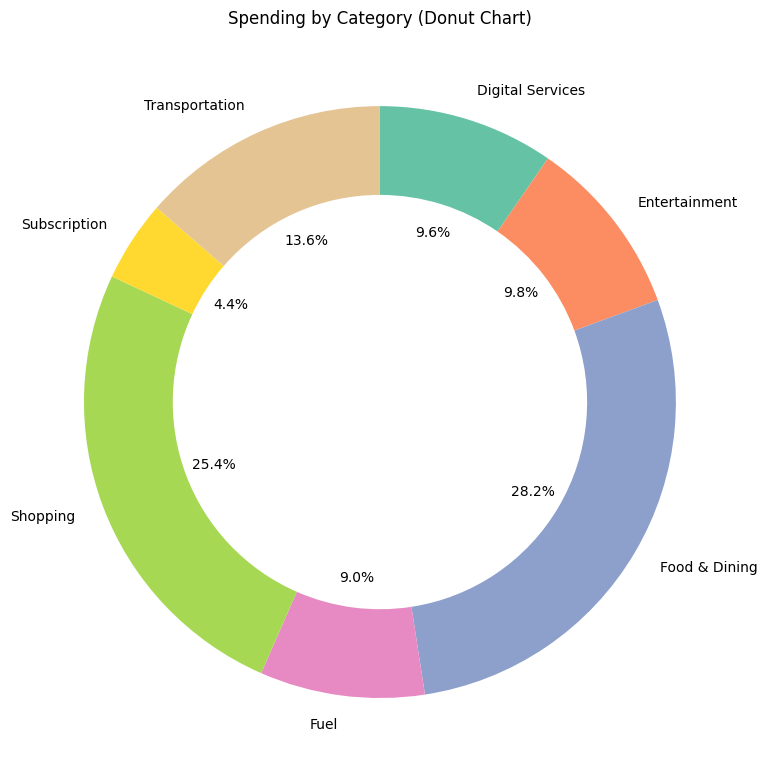

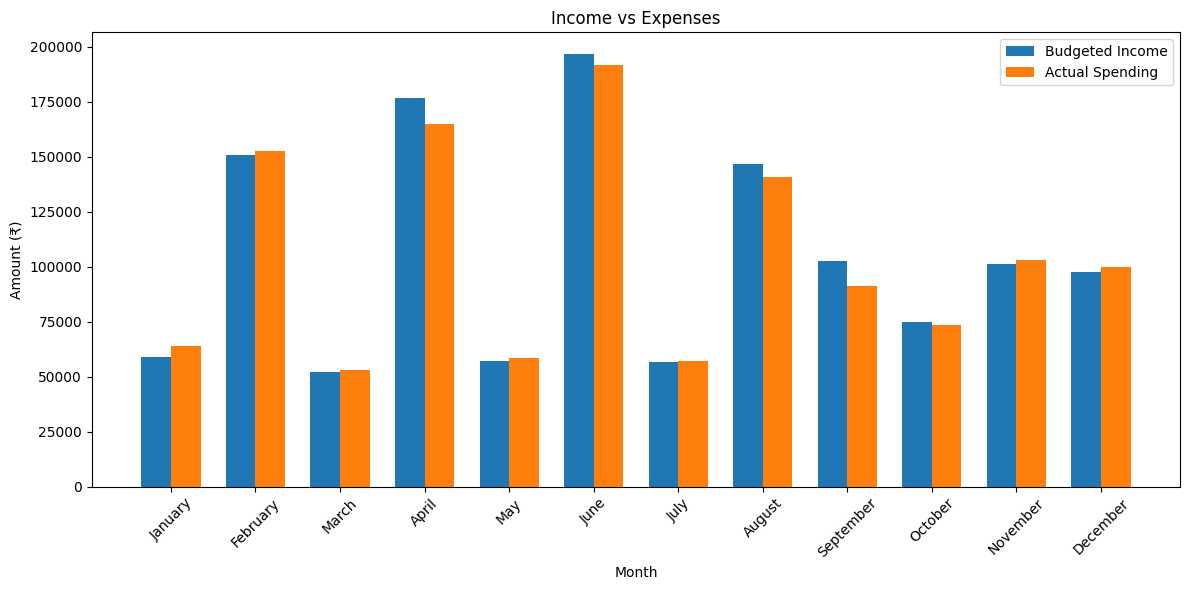

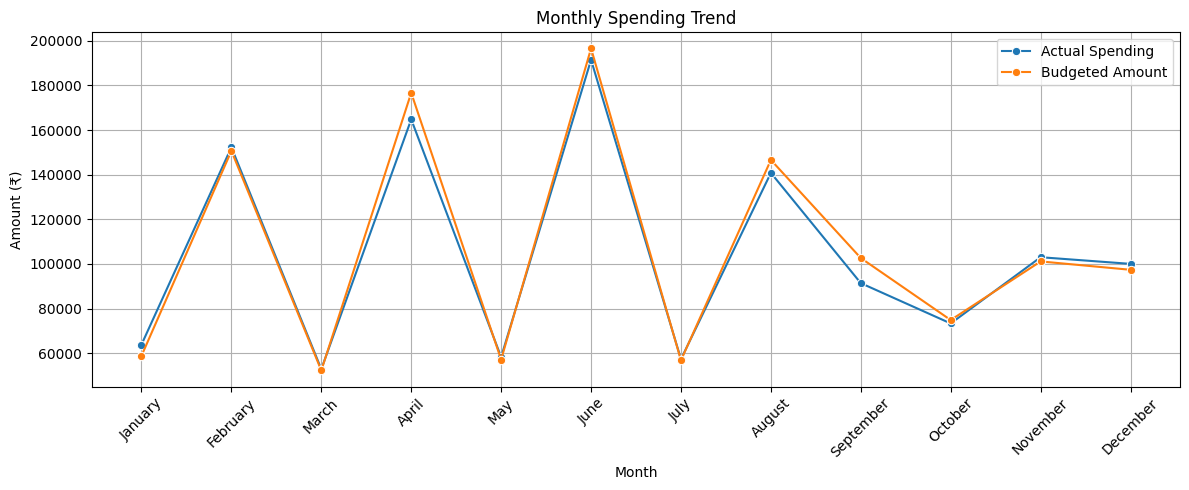

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Budget_Spending_Data_Final.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.strftime('%B')

# 1️⃣ Donut Chart: Spending by Category (Feature)
spending_by_feature = df.groupby("Feature")["Actual Spending"].sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(spending_by_feature))
plt.pie(spending_by_feature, labels=spending_by_feature.index, startangle=90, counterclock=False,
        autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=colors)
plt.title("Spending by Category (Donut Chart)")
plt.tight_layout()
plt.show()

# 2️⃣ Double Bar Graph: Income vs Expenses per Month
monthly_summary = df.groupby("Month")[["Budgeted Amount", "Actual Spending"]].sum().reset_index()
monthly_summary = monthly_summary.sort_values(by="Month", key=lambda x: pd.to_datetime(x, format="%B"))

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(monthly_summary))

plt.bar(index, monthly_summary["Budgeted Amount"], width=bar_width, label='Budgeted Income')
plt.bar([i + bar_width for i in index], monthly_summary["Actual Spending"], width=bar_width, label='Actual Spending')

plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.title("Income vs Expenses")
plt.xticks([i + bar_width / 2 for i in index], monthly_summary["Month"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3️⃣ Line Chart: Monthly Trends of Spending
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_summary, x="Month", y="Actual Spending", marker='o', label="Actual Spending")
sns.lineplot(data=monthly_summary, x="Month", y="Budgeted Amount", marker='o', label="Budgeted Amount")
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
